In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
path = './pre-processed_chess_data2.csv'
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16053 entries, 0 to 16052
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event            16053 non-null  object 
 1   result           16053 non-null  object 
 2   white_elo        16053 non-null  int64  
 3   black_elo        16053 non-null  int64  
 4   eco              16053 non-null  object 
 5   event_type       16053 non-null  object 
 6   rd_white         6795 non-null   float64
 7   rd_black         6755 non-null   float64
 8   flag_white       1529 non-null   object 
 9   flag_black       1565 non-null   object 
 10  play_time_white  6929 non-null   float64
 11  play_time_black  6881 non-null   float64
 12  rated            16053 non-null  int64  
 13  time             16053 non-null  int64  
 14  increment        16053 non-null  int64  
 15  rating_diff      16053 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 2.0+ MB


In [11]:
df['event'].unique()

array(['Rated Rapid game', 'Rapid swiss', 'Rated Rapid tournament'],
      dtype=object)

In [5]:
df = df[df['result'] != "*"]

In [6]:
df['result'].value_counts()

result
0-1        6079
1-0        6031
1/2-1/2    3943
Name: count, dtype: int64

In [7]:
win_rate = df[(df['rating_diff'] > 0) & (df['result'] == '1-0')].shape[0] / df[df['rating_diff'] > 0].shape[0]
print(f"Win rate for player with higher rating: {win_rate:.2%}")

Win rate for player with higher rating: 41.78%


In [8]:
#hisplot each type of event that either blitz, rapid or classical or bullet (group events that have bllet in their name to a single category, same for rapid and classical and blitz)
df['event_type'] = df['event'].apply(lambda x: 'blitz' if 'blitz' in x.lower() else ('rapid' if 'rapid' in x.lower() else ('classical' if 'classical' in x.lower() else 'bullet')))
event_counts = df['event_type'].value_counts()
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=event_counts.index, y=event_counts.values, name='Event Type'))
fig.update_layout(title='Distribution of Event Types', xaxis_title='Event Type',
                    yaxis_title='Count', template='plotly_white')
fig.show()


# now filter to show only drawn games
drawn_games = df[df['result'] == '1/2-1/2'] 
drawn_games_count = drawn_games.shape[0]
print(f"Number of drawn games: {drawn_games_count}")
# plot the distribution of drawn games by event type
drawn_event_counts = drawn_games['event_type'].value_counts()
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=drawn_event_counts.index, y=drawn_event_counts.values, name='Drawn Games by Event Type'))
fig.update_layout(title='Distribution of Drawn Games by Event Type', 
                  xaxis_title='Event Type', yaxis_title='Count',
                  template='plotly_white')
fig.show()


Number of drawn games: 3943


<Axes: xlabel='white_elo', ylabel='black_elo'>

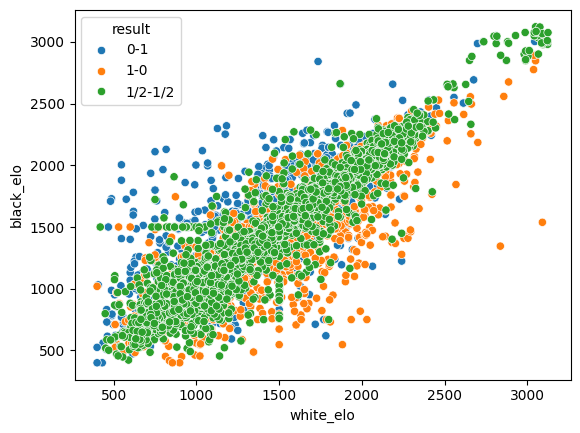

In [9]:
sns.scatterplot(data = df, x = 'white_elo', y = 'black_elo', hue = 'result' )

In [10]:
sns.histplot(data = df[df['white_form'] == 1], x = 'result')

KeyError: 'white_form'

<Axes: xlabel='result', ylabel='Count'>

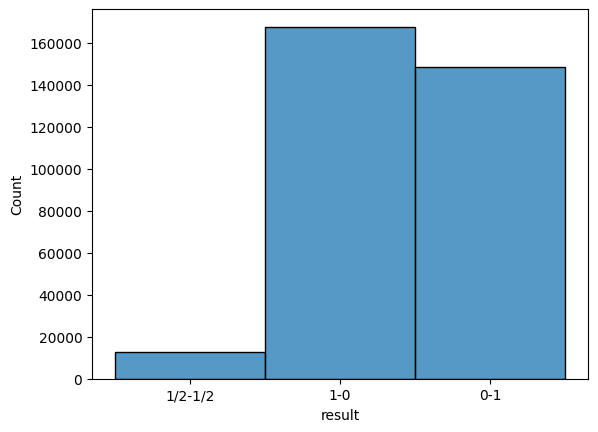

In [27]:
sns.histplot(data = df[df['white_form'] == 2], x = 'result')

<Axes: xlabel='result', ylabel='Count'>

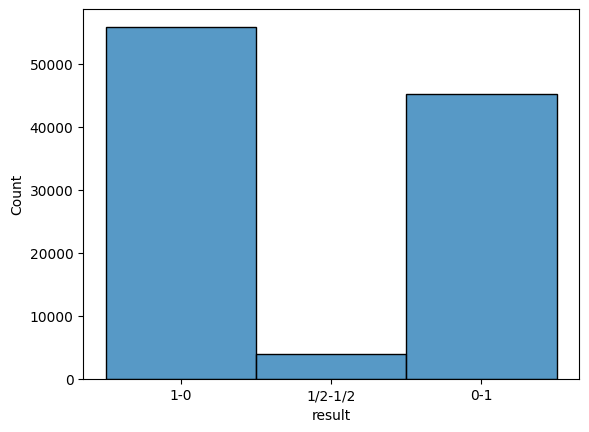

In [28]:
sns.histplot(data = df[df['white_form'] == 3], x = 'result')

<Axes: xlabel='result', ylabel='Count'>

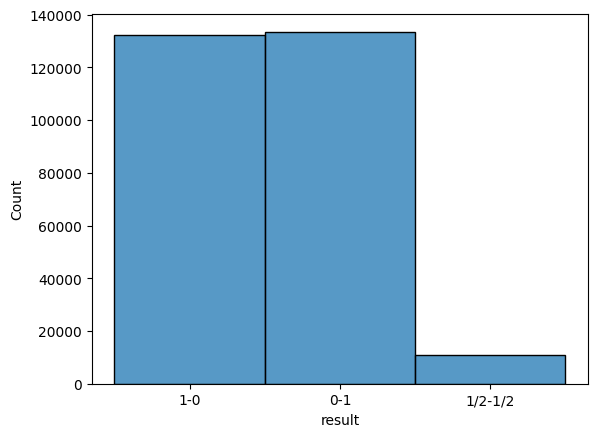

In [29]:
sns.histplot(data = df[df['white_form'] == 0], x = 'result')

<Axes: xlabel='result', ylabel='Count'>

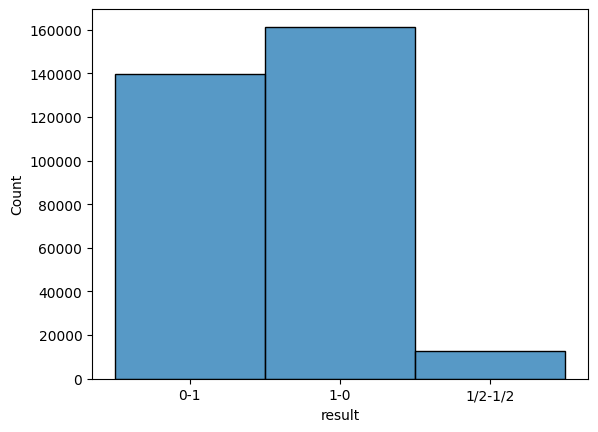

In [30]:
sns.histplot(data = df[df['black_form'] == 0], x = 'result')

<Axes: xlabel='result', ylabel='Count'>

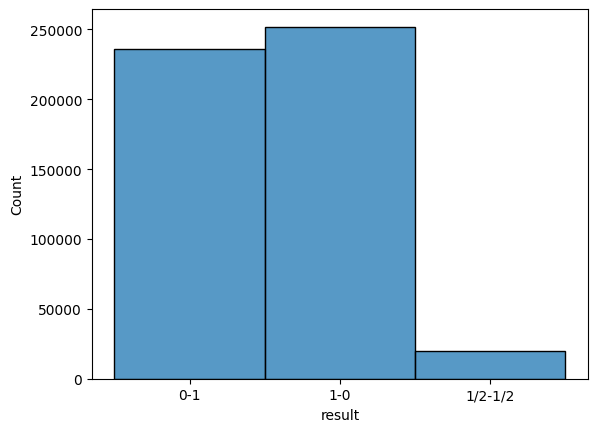

In [31]:
sns.histplot(data = df[df['black_form'] == 1], x = 'result')

<Axes: xlabel='result', ylabel='Count'>

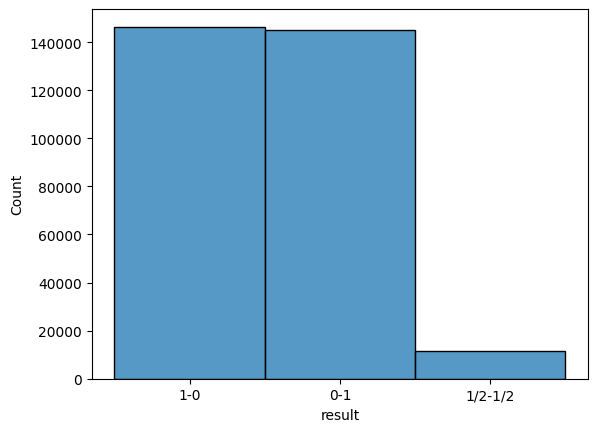

In [32]:
sns.histplot(data = df[df['black_form'] == 2], x = 'result')

<Axes: xlabel='result', ylabel='Count'>

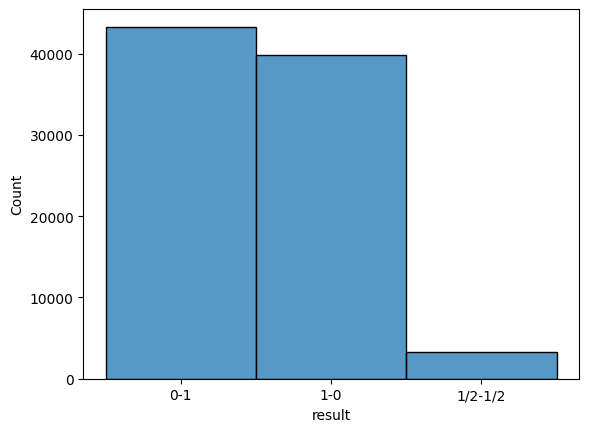

In [33]:
sns.histplot(data = df[df['black_form'] == 3], x = 'result')

<Axes: xlabel='result', ylabel='rating_diff'>

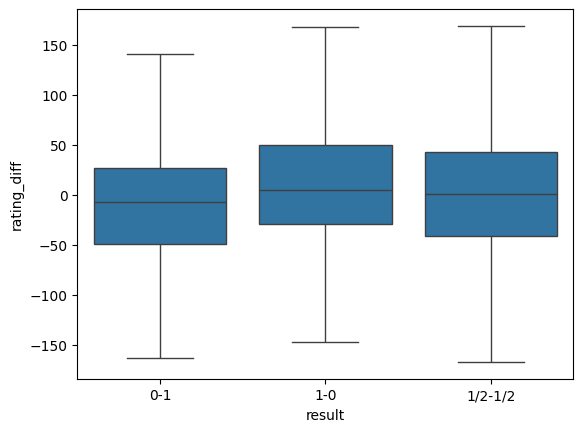

In [12]:
sns.boxplot(data = df, x = 'result', y = 'rating_diff', showfliers=False)

<Axes: xlabel='white_elo', ylabel='Count'>

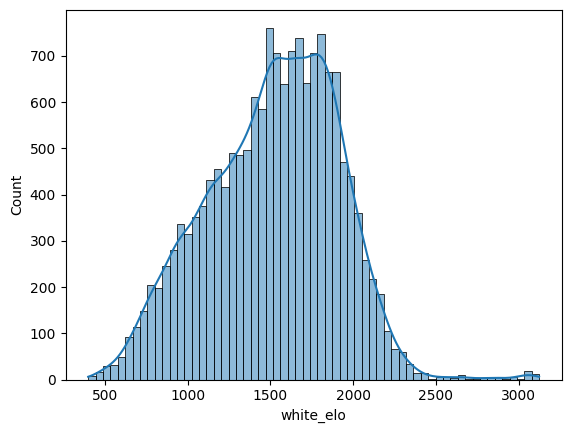

In [13]:
sns.histplot(data=df, x='white_elo', kde=True)

<Axes: xlabel='black_elo', ylabel='Count'>

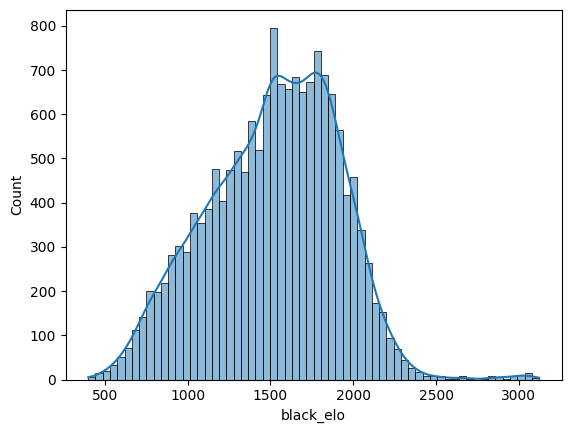

In [14]:
sns.histplot(data=df, x='black_elo', kde=True)

<Axes: xlabel='eco'>

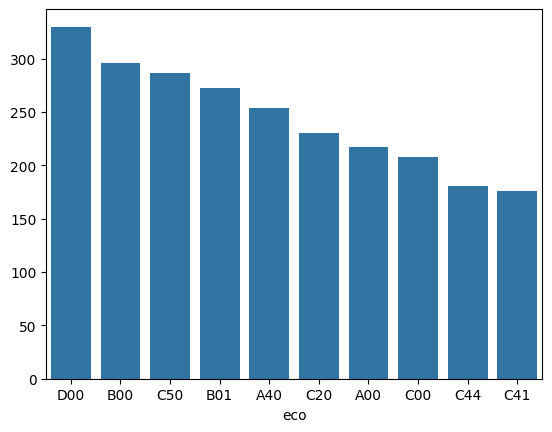

In [15]:
eco_counts = df[df['result'] == '1-0']['eco'].value_counts().head(10).sort_values(ascending=False)
sns.barplot(x=eco_counts.index, y=eco_counts.values)

<Axes: xlabel='eco'>

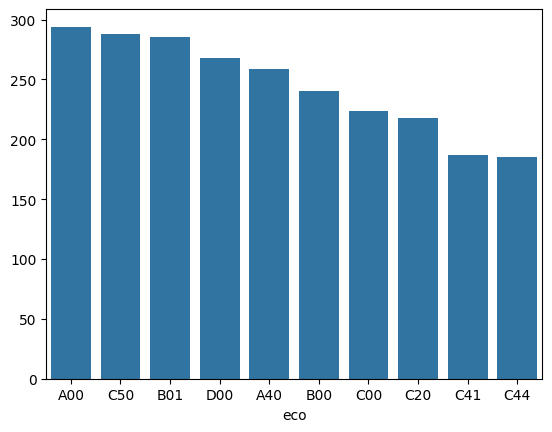

In [16]:
eco_counts = df[df['result'] == '0-1']['eco'].value_counts().head(10).sort_values(ascending=False)
sns.barplot(x=eco_counts.index, y=eco_counts.values)

<Axes: xlabel='eco'>

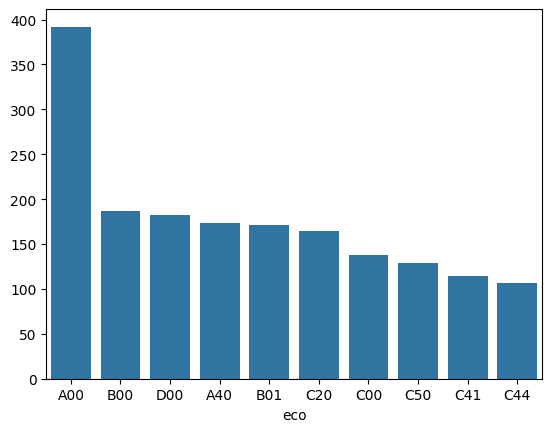

In [20]:
eco_counts = df[df['result'] == '1/2-1/2']['eco'].value_counts().head(10).sort_values(ascending=False)
sns.barplot(x=eco_counts.index, y=eco_counts.values)

<Axes: xlabel='eco'>

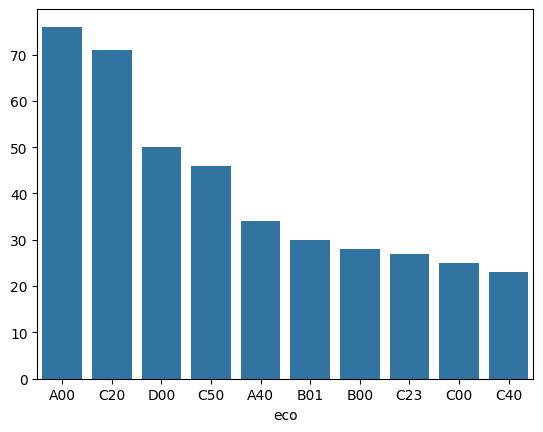

In [17]:
eco_counts = df[(df['result'] == '0-1') & (df['white_elo'] < 1000)]['eco'].value_counts().head(10).sort_values(ascending=False)
sns.barplot(x=eco_counts.index, y=eco_counts.values)

<Axes: xlabel='eco'>

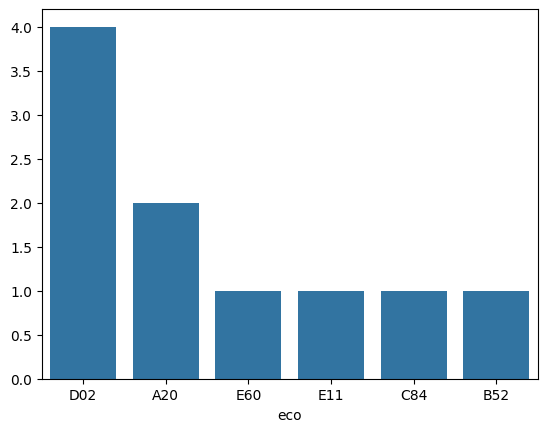

In [18]:
eco_counts = df[(df['result'] == '0-1') & (df['white_elo'] > 2500)]['eco'].value_counts().head(10).sort_values(ascending=False)
sns.barplot(x=eco_counts.index, y=eco_counts.values)